In [111]:
import pandas as pd

In [ ]:
data=pd.read_csv("Online_Learning_Data.csv")
data

### Viewing Columns

In [113]:
data.columns

Index(['Month', 'Argentina', 'Brazil', 'Colombia', 'France', 'Germany',
       'India', 'Indonesia', 'Iran', 'Italy', 'Mexico', 'Peru', 'Philippines',
       'Poland', 'Russia', 'South Africa', 'Spain', 'Turkey', 'Ukraine',
       'United Kingdom', 'United States of America'],
      dtype='object')

### Checking for duplicates

In [ ]:
data.drop_duplicates()

### Checking for Null Values

In [ ]:
data.isnull().sum()

### Checking for Nan 

In [ ]:
data.isna().sum()

### Inserting a New Column (Year)

In [116]:
#inserting a new column
data.insert(0,"Year",'')

In [ ]:
data

In [118]:
#Changing the month column datatype from Object to datetime
data.Month=data["Month"].astype("datetime64[ns]")

In [ ]:
#checking data types
data.dtypes

In [120]:
#Extacting year from month column and assigning it to the Year column
data.Year=data["Month"].dt.to_period("Y")

In [155]:
data.head()


,Year,Month,Argentina,Brazil,Colombia,France,Germany,India,Indonesia,Iran,...,Peru,Philippines,Poland,Russia,South Africa,Spain,Turkey,Ukraine,United Kingdom,United States of America
0,2004,2004-01-01,0,0,0,0,35,44,0,0,...,0,0,0,100,0,53,73,0,69,75
1,2004,2004-02-01,100,0,0,43,38,59,41,0,...,100,31,0,0,82,0,72,0,50,56
2,2004,2004-03-01,0,90,0,0,48,74,0,0,...,0,0,0,0,100,0,0,0,81,50
3,2004,2004-04-01,0,0,0,0,39,72,39,0,...,0,0,0,85,0,0,57,0,38,74
4,2004,2004-05-01,0,0,0,0,34,24,100,0,...,0,66,100,0,0,87,0,0,37,46


### Getting the total data from 2004-2021 for each country (SPAIN, FRANCE, AND INDIA)

In [122]:
countries= ["Spain","France","India"]
total = data.groupby("Year")[countries].sum()

In [152]:
total

,Spain,France,India
Year,,,
2004,275,235,529
2005,374,126,797
2006,140,183,636
2007,182,166,527
2008,270,109,461
2009,266,132,449
2010,261,98,365
2011,258,118,313
2012,405,92,284


### Checking for the Lowest and Highest year of Online Learning of Spain,France and India

In [151]:
for country in countries:
    lowest_year=total[country].idxmin()
    highest_year=total[country].idxmax()
    lowest_value=total[country].min()
    highest_value=total[country].max()
    print(f"For {country}:")
    print(f" Lowest year:{lowest_year} with a sum of {lowest_value}")
    print(f" Highest year:{highest_year} with a sum of {highest_value}")

For Spain:
 Lowest year:2006 with a sum of 140
 Highest year:2020 with a sum of 546
For France:
 Lowest year:2014 with a sum of 78
 Highest year:2004 with a sum of 235
For India:
 Lowest year:2018 with a sum of 135
 Highest year:2005 with a sum of 797


In [138]:
from plotly.offline import init_notebook_mode
import cufflinks as cf
cf.go_offline()

### Ploting a line chart to view results

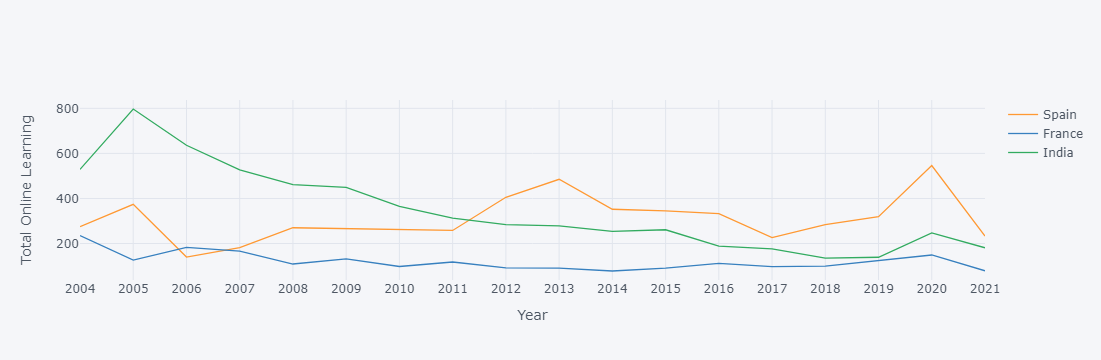

In [144]:
total.iplot(kind='line',xTitle='Year',yTitle='Total Online Learning')